In [ ]:
import numpy as np 
from keras.models import Sequential 
from keras.layers import Dense
import os

In [ ]:
os.chdir('/content/drive/MyDrive/Josue/Maestria UNAM/Tercer semestre/ClasePython/Aragon')

In [ ]:
# redshift, photo-z, m+u, m_g, m_r, m_i, m_z, petro50, petro90
sdss =  np.load('DR9_photo-z-small.npy')

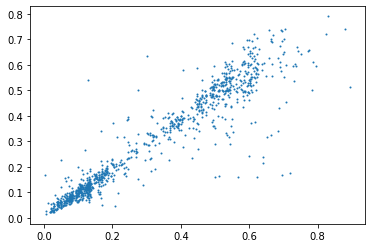

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(sdss[0:1000,0], sdss[0:1000,1], s=1)
plt.show()

In [ ]:
n = sdss.shape[0]

x_train = np.zeros((100000,6), dtype = np.float32)
x_train[:,0] = sdss[:,2] #m_u
x_train[:,1] = sdss[:,3] #m_g
x_train[:,2] = sdss[:,4] #m_r
x_train[:,3] = sdss[:,5] #m_i
x_train[:,4] = sdss[:,6] #m_z
x_train[:,5] = sdss[:,8] #petro90


Y_train = sdss[:,0]

In [ ]:
model = Sequential()

model.add(Dense(8, input_dim = 6, activation = 'relu') ) # 8 neuronas

model.add(Dense(4, input_dim = 6, activation = 'relu') ) #4 neuronas

model.add(Dense(1, input_dim = 6, activation = 'linear') ) # 1 neurona

model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mse'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 8)                 56        
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit( x_train, Y_train, epochs = 20, batch_size = 10)

Epoch 1/20
10000/10000 [==============================] - 17s 2ms/step - loss: 0.1762 - mse: 0.1762
Epoch 2/20
10000/10000 [==============================] - 16s 2ms/step - loss: 0.0283 - mse: 0.0283
Epoch 3/20
10000/10000 [==============================] - 16s 2ms/step - loss: 0.0209 - mse: 0.0209
Epoch 4/20
10000/10000 [==============================] - 16s 2ms/step - loss: 0.0181 - mse: 0.0181
Epoch 5/20
10000/10000 [==============================] - 16s 2ms/step - loss: 0.0107 - mse: 0.0107
Epoch 6/20
10000/10000 [==============================] - 16s 2ms/step - loss: 0.0104 - mse: 0.0104
Epoch 7/20
10000/10000 [==============================] - 16s 2ms/step - loss: 0.0107 - mse: 0.0107
Epoch 8/20
10000/10000 [==============================] - 15s 2ms/step - loss: 0.0065 - mse: 0.0065
Epoch 9/20
10000/10000 [==============================] - 15s 2ms/step - loss: 0.0063 - mse: 0.0063
Epoch 10/20
10000/10000 [==============================] - 15s 2ms/step - loss: 0.0059 - mse: 0.0059

In [ ]:
Y_pred = model.predict(x_train[0:1000])

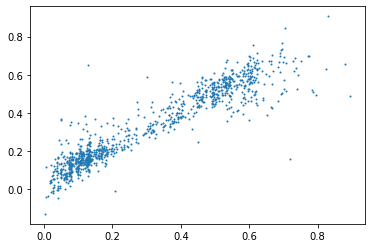

0.2913256


In [ ]:
plt.scatter(sdss[0:1000,0], Y_pred, s=1)
plt.show()

print(np.std(sdss[0:1000,0] - Y_pred))